In [0]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras.layers import Dense, Flatten

import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [196]:
model_fit = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(2058, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_fit.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

fit_epochs = 30
history_fit = model_fit.fit(train_images, 
                      train_labels,
                      batch_size=10000, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 20s 337us/sample - loss: 1.8992 - acc: 0.3623 - val_loss: 1.9032 - val_acc: 0.4692
Epoch 2/30
60000/60000 [==============================] - 19s 324us/sample - loss: 1.3137 - acc: 0.5442 - val_loss: 1.0406 - val_acc: 0.6194
Epoch 3/30
60000/60000 [==============================] - 19s 324us/sample - loss: 0.9262 - acc: 0.6346 - val_loss: 0.8264 - val_acc: 0.6795
Epoch 4/30
60000/60000 [==============================] - 19s 324us/sample - loss: 0.7514 - acc: 0.7120 - val_loss: 0.7186 - val_acc: 0.7211
Epoch 5/30
60000/60000 [==============================] - 19s 324us/sample - loss: 0.6544 - acc: 0.7504 - val_loss: 0.6501 - val_acc: 0.7530
Epoch 6/30
60000/60000 [==============================] - 19s 324us/sample - loss: 0.5946 - acc: 0.7785 - val_loss: 0.5803 - val_acc: 0.7750
Epoch 7/30
60000/60000 [==============================] - 19s 323us/sample - loss: 0.5541 - acc: 0.7907 

In [236]:
model_underfit = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(2, activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

model_underfit.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

under_epochs = 10
history_underfit = model_underfit.fit(train_images[:10], 
                      train_labels[:10], 
                      epochs=under_epochs,  
                      validation_data=(test_images, test_labels))

Train on 10 samples, validate on 10000 samples
Epoch 1/10
10/10 [==============================] - 1s 145ms/sample - loss: 2.2996 - acc: 0.2000 - val_loss: 2.3017 - val_acc: 0.0702
Epoch 2/10
10/10 [==============================] - 0s 44ms/sample - loss: 2.2964 - acc: 0.3000 - val_loss: 2.3015 - val_acc: 0.0705
Epoch 3/10
10/10 [==============================] - 0s 43ms/sample - loss: 2.2919 - acc: 0.3000 - val_loss: 2.3013 - val_acc: 0.0700
Epoch 4/10
10/10 [==============================] - 0s 44ms/sample - loss: 2.2874 - acc: 0.3000 - val_loss: 2.3011 - val_acc: 0.0674
Epoch 5/10
10/10 [==============================] - 0s 46ms/sample - loss: 2.2830 - acc: 0.3000 - val_loss: 2.3014 - val_acc: 0.0639
Epoch 6/10
10/10 [==============================] - 0s 46ms/sample - loss: 2.2788 - acc: 0.2000 - val_loss: 2.3023 - val_acc: 0.0596
Epoch 7/10
10/10 [==============================] - 0s 46ms/sample - loss: 2.2783 - acc: 0.2000 - val_loss: 2.3024 - val_acc: 0.0878
Epoch 8/10
10/10 [===

In [230]:
model_overfit = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

model_overfit.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

over_epochs = 25
history_overfit = model_overfit.fit(train_images[:50], 
                                    train_labels[:50],
                                    epochs=over_epochs,
                                    validation_data=(test_images, test_labels))


Train on 50 samples, validate on 10000 samples
Epoch 1/25
50/50 [==============================] - 1s 22ms/sample - loss: 2.3923 - acc: 0.0600 - val_loss: 2.3324 - val_acc: 0.1211
Epoch 2/25
50/50 [==============================] - 0s 9ms/sample - loss: 2.1614 - acc: 0.2200 - val_loss: 2.2405 - val_acc: 0.1769
Epoch 3/25
50/50 [==============================] - 0s 9ms/sample - loss: 2.0017 - acc: 0.3200 - val_loss: 2.1672 - val_acc: 0.2487
Epoch 4/25
50/50 [==============================] - 0s 9ms/sample - loss: 1.8700 - acc: 0.3800 - val_loss: 2.0901 - val_acc: 0.2910
Epoch 5/25
50/50 [==============================] - 0s 9ms/sample - loss: 1.7539 - acc: 0.4200 - val_loss: 2.0050 - val_acc: 0.3305
Epoch 6/25
50/50 [==============================] - 0s 9ms/sample - loss: 1.6393 - acc: 0.5200 - val_loss: 1.9231 - val_acc: 0.3579
Epoch 7/25
50/50 [==============================] - 0s 9ms/sample - loss: 1.5430 - acc: 0.5800 - val_loss: 1.8401 - val_acc: 0.3825
Epoch 8/25
50/50 [==========

In [199]:
model_fit.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_79 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_80 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_81 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_82 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_83 (Dense)             (None, 512)             

In [200]:
model_underfit.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 2)                 1570      
_________________________________________________________________
dense_88 (Dense)             (None, 10)                30        
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


In [201]:
model_overfit.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_89 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_90 (Dense)             (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [243]:
test_fit_loss, test_fit_acc = model_fit.evaluate(test_images, test_labels)
test_under_loss, test_under_acc = model_underfit.evaluate(test_images, test_labels)
test_over_loss, test_over_acc = model_overfit.evaluate(test_images, test_labels)

print('Fit Model: Test accuracy:', test_fit_acc*100)
print('Underfit Model: Test accuracy:', test_under_acc*100)
print('Overfit Model: Test accuracy:', test_over_acc*100,'\n\n')
print('Fit Model: Test loss:', test_fit_loss)
print('Underfit Model: Test loss:', test_under_loss)
print('Overfit Model: Test loss:', test_over_loss)

10000/10000 [==============================] - 0s 41us/sample - loss: 1.2047 - acc: 0.5881
Fit Model: Test accuracy: 87.1999979019165
Underfit Model: Test accuracy: 10.300000011920929
Overfit Model: Test accuracy: 58.810001611709595 


Fit Model: Test loss: 0.3594939056158066
Underfit Model: Test loss: 2.3010582649230957
Overfit Model: Test loss: 1.204738477897644


In [0]:
history_fit_dict = history_fit.history
loss_fit_values = history_fit_dict['loss']
test_fit_loss_values = history_fit_dict['val_loss']
epochs_fit_range = range(1, fit_epochs+1)

history_under_dict = history_underfit.history
loss_under_values = history_under_dict['loss']
test_under_loss_values = history_under_dict['val_loss']
epochs_under_range = range(1, under_epochs+1)

history_over_dict = history_overfit.history
loss_over_values = history_over_dict['loss']
test_over_loss_values = history_over_dict['val_loss']
epochs_over_range = range(1, over_epochs+1)

modelHistory = [[history_fit_dict, loss_fit_values, test_fit_loss_values, epochs_fit_range],
                [history_under_dict, loss_under_values, test_under_loss_values, epochs_under_range],
                [history_over_dict, loss_over_values, test_over_loss_values, epochs_over_range]]

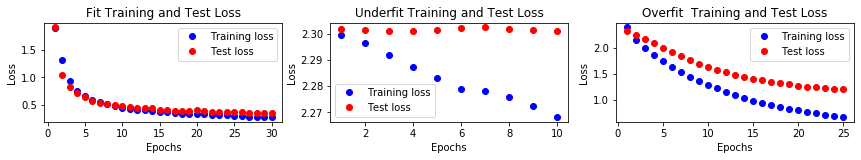

In [240]:
fig = plt.figure()
fig.subplots_adjust(right=2)
for i in range(1, 4):
    plt.subplot(2, 3, i)
    plt.plot(modelHistory[i-1][3], modelHistory[i-1][1], 'bo', label='Training loss')
    plt.plot(modelHistory[i-1][3], modelHistory[i-1][2], 'ro', label='Test loss')
    if(i==1):
      plt.title('Fit Training and Test Loss')
    elif(i==2):
      plt.title('Underfit Training and Test Loss')
    else:
      plt.title('Overfit  Training and Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()


In [0]:
acc_fit_values = history_fit_dict['acc']
test_acc_fit_values = history_fit_dict['val_acc']

acc_under_values = history_under_dict['acc']
test_acc_under_values = history_under_dict['val_acc']

acc_over_values = history_over_dict['acc']
test_acc_over_values = history_over_dict['val_acc']

accHistory = [[acc_fit_values, test_acc_fit_values],
              [acc_under_values, test_acc_under_values],
              [acc_over_values, test_acc_over_values]]

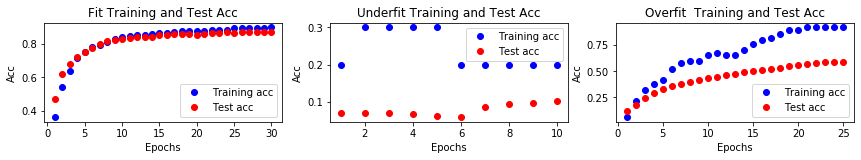

In [242]:
fig = plt.figure()
fig.subplots_adjust(right=2)
for i in range(1, 4):
    plt.subplot(2, 3, i)
    plt.plot(modelHistory[i-1][3], accHistory[i-1][0], 'bo', label='Training acc')
    plt.plot(modelHistory[i-1][3], accHistory[i-1][1], 'ro', label='Test acc')
    if(i==1):
      plt.title('Fit Training and Test Acc')
    elif(i==2):
      plt.title('Underfit Training and Test Acc')
    else:
      plt.title('Overfit  Training and Test Acc')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()